## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4, l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_ratio, l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_ratio, l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 25
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [0, 1e-2, 1e-4]
L2_EXP = [0, 1e-2, 1e-4]

In [13]:
results = {}
"""
使用迴圈建立不同的帶不同 L1/L2 的模型並訓練
"""
for reg_l1 in L1_EXP:
    for reg_l2 in L2_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer L1 = %.6f & L2 = %.6f" % (reg_l1, reg_l2))
        model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=reg_l1, l2_ratio=reg_l2)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-l1-%s-l2-%s" % (str(reg_l1), str(reg_l2))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with Regulizer L1 = 0.000000 & L2 = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/2

50000/50000 [==============================] - 2s 49us/step - loss: 2.9548 - accuracy: 0.4599 - val_loss: 2.9147 - val_accuracy: 0.4438
Epoch 17/25
50000/50000 [==============================] - 3s 51us/step - loss: 2.7718 - accuracy: 0.4619 - val_loss: 2.7000 - val_accuracy: 0.4592
Epoch 18/25
50000/50000 [==============================] - 2s 49us/step - loss: 2.6139 - accuracy: 0.4668 - val_loss: 2.5573 - val_accuracy: 0.4549
Epoch 19/25
50000/50000 [==============================] - 2s 49us/step - loss: 2.4788 - accuracy: 0.4693 - val_loss: 2.4647 - val_accuracy: 0.4481
Epoch 20/25
50000/50000 [==============================] - 2s 49us/step - loss: 2.3631 - accuracy: 0.4704 - val_loss: 2.3294 - val_accuracy: 0.4644
Epoch 21/25
50000/50000 [==============================] - 3s 53us/step - loss: 2.2637 - accuracy: 0.4748 - val_loss: 2.2695 - val_accuracy: 0.4597
Epoch 22/25
50000/50000 [==============================] - 3s 54us/step - loss: 2.1773 - accuracy: 0.4766 - val_loss: 2.1565

50000/50000 [==============================] - 2s 49us/step - loss: 2.4626 - accuracy: 0.0993 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 7/25
50000/50000 [==============================] - 2s 49us/step - loss: 2.4626 - accuracy: 0.0975 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 8/25
50000/50000 [==============================] - 2s 49us/step - loss: 2.4626 - accuracy: 0.0992 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 9/25
50000/50000 [==============================] - 2s 49us/step - loss: 2.4626 - accuracy: 0.0977 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 10/25
50000/50000 [==============================] - 2s 49us/step - loss: 2.4626 - accuracy: 0.0985 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 11/25
50000/50000 [==============================] - 2s 49us/step - loss: 2.4626 - accuracy: 0.0990 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 12/25
50000/50000 [==============================] - 2s 49us/step - loss: 2.4626 - accuracy: 0.0969 - val_loss: 2.4625 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s 57us/step - loss: 198.8093 - accuracy: 0.2355 - val_loss: 41.1732 - val_accuracy: 0.2747
Epoch 2/25
50000/50000 [==============================] - 3s 53us/step - loss: 19.1369 - accuracy: 0.1205 - val_loss: 7.2692 - val_accuracy: 0.1000
Epoch 3/25
50000/50000 [==============================] - 3s 52us/step - loss: 4.1053 - accuracy: 0.0994 - val_loss: 2.6458 - val_accuracy: 0.1000
Epoch 4/25
50000/50000 [==============================] - 3s 52us/step - loss: 2.4855 - accuracy: 0.0988 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 5/25
50000/50000 [==============================] - 3s 53us/step - loss: 2.4626 - accuracy: 0.0978 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 6/25
50000/50000 [==============================] - 3s 53us/step - loss: 2.4626 - accuracy: 0.0993 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 7/25
50000/50000 [==============================] - 3s 54u

50000/50000 [==============================] - 2s 49us/step - loss: 3.9580 - accuracy: 0.5530 - val_loss: 4.1255 - val_accuracy: 0.4875
Epoch 24/25
50000/50000 [==============================] - 2s 49us/step - loss: 3.8986 - accuracy: 0.5578 - val_loss: 3.9949 - val_accuracy: 0.5100
Epoch 25/25
50000/50000 [==============================] - 2s 49us/step - loss: 3.8372 - accuracy: 0.5594 - val_loss: 3.9290 - val_accuracy: 0.5123
Experiment with Regulizer L1 = 0.000100 & L2 = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________

50000/50000 [==============================] - 3s 52us/step - loss: 4.7146 - accuracy: 0.5059 - val_loss: 4.7366 - val_accuracy: 0.4844
Epoch 14/25
50000/50000 [==============================] - 3s 52us/step - loss: 4.6355 - accuracy: 0.5114 - val_loss: 4.6641 - val_accuracy: 0.4847
Epoch 15/25
50000/50000 [==============================] - 3s 52us/step - loss: 4.5557 - accuracy: 0.5167 - val_loss: 4.5819 - val_accuracy: 0.4931
Epoch 16/25
50000/50000 [==============================] - 3s 52us/step - loss: 4.4791 - accuracy: 0.5227 - val_loss: 4.5161 - val_accuracy: 0.4905
Epoch 17/25
50000/50000 [==============================] - 3s 52us/step - loss: 4.4037 - accuracy: 0.5308 - val_loss: 4.4455 - val_accuracy: 0.4988
Epoch 18/25
50000/50000 [==============================] - 3s 52us/step - loss: 4.3322 - accuracy: 0.5334 - val_loss: 4.3703 - val_accuracy: 0.5061
Epoch 19/25
50000/50000 [==============================] - 3s 51us/step - loss: 4.2566 - accuracy: 0.5401 - val_loss: 4.3083

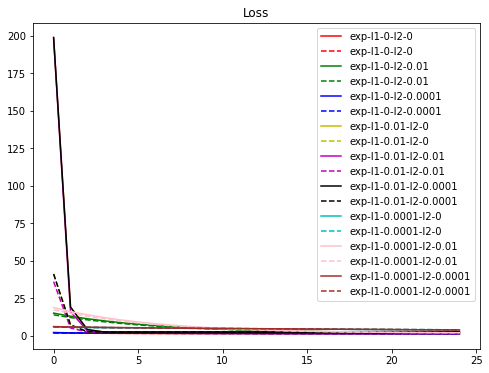

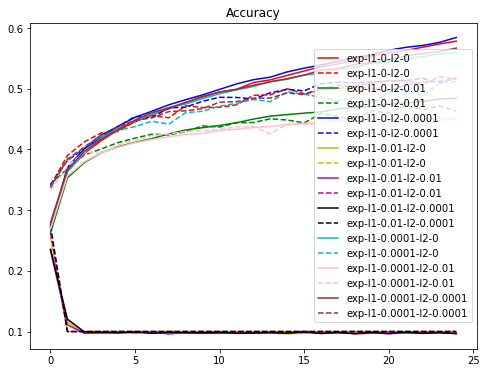

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k", "c", "pink", "brown"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()